In [15]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# Загрузка данных
df = pd.read_csv('2023-11-07_Opros_pervokursnikov_3.csv')  

# Преобразование категориальных признаков в числовой формат
label_encoder = LabelEncoder()
df['Ответ_вопроса_1'] = label_encoder.fit_transform(df['Какое из утверждений наиболее близко описывает ваше отношение к участию в научных конференциях?'])
df['Ответ_вопроса_2'] = label_encoder.fit_transform(df['В какой тематике вы бы хотели участвовать в научной конференции?'])

# Кластеризация с использованием Agglomerative Clustering
n_clusters = 4  # Задаем количество кластеров
agg_cluster = AgglomerativeClustering(n_clusters=n_clusters)
labels_agg = agg_cluster.fit_predict(df[['Ответ_вопроса_1']])

# Добавление столбца 'Cluster' с метками кластеров в исходный датасет
df['Cluster'] = labels_agg

# Вывод результатов
df.to_csv(f'result_df.csv', index=False)


In [16]:
df['Target_Cluster'] = 0

# Условия для включения ответов в целевой кластер
target_conditions = (
    ((df['Какое из утверждений наиболее близко описывает ваше отношение к участию в научных конференциях?'] == 'Мне интересно, но я ещё не участвовал') & 
     df['В какой тематике вы бы хотели участвовать в научной конференции?'].isin(['Любая тема интересует', 'Технологии и инновации'])),
    ((df['Какое из утверждений наиболее близко описывает ваше отношение к участию в научных конференциях?'] == 'Я активно ищу возможности для участия') & 
     df['В какой тематике вы бы хотели участвовать в научной конференции?'].isin(['Любая тема интересует', 'Технологии и инновации']))
    # достаточно спорный/ситуативный выбор - поэтому закомментирован
    # ((df['Какое из утверждений наиболее близко описывает ваше отношение к участию в научных конференциях?'] == 'Я не знаю, что такое научные конференции.') & 
    #  df['В какой тематике вы бы хотели участвовать в научной конференции?'].isin(['Любая тема интересует', 'Технологии и инновации']))
)

# Применяем условия к каждому кластеру
df.loc[target_conditions[0], 'Target_Cluster'] = 1
df.loc[target_conditions[1], 'Target_Cluster'] = 1
#df.loc[target_conditions[2], 'Target_Cluster'] = 1


In [17]:
result_df_data = df[['Какое из утверждений наиболее близко описывает ваше отношение к участию в научных конференциях?',
                    'В какой тематике вы бы хотели участвовать в научной конференции?', 'Cluster', 'Target_Cluster']]
result_df_data.to_csv('result_df_data.csv', index=False)

cluster_counts = result_df_data['Cluster'].value_counts()
custom_cluster_counts = result_df_data['Target_Cluster'].value_counts()

print("Standard Clusters:")
print(cluster_counts)

print("\nTarget Cluster:")
print(custom_cluster_counts)

Standard Clusters:
Cluster
0    80
2    51
1    11
3     8
Name: count, dtype: int64

Target Cluster:
Target_Cluster
0    94
1    56
Name: count, dtype: int64


In [18]:
cluster_distribution = result_df_data.groupby(['Какое из утверждений наиболее близко описывает ваше отношение к участию в научных конференциях?',
                                            'В какой тематике вы бы хотели участвовать в научной конференции?',
                                            'Cluster', 'Target_Cluster']).size().reset_index(name='Counts')

total_responses = cluster_distribution['Counts'].sum()
cluster_distribution['Percentage'] = (cluster_distribution['Counts'] / total_responses) * 100

cluster_distribution.to_csv('final_df_data.csv', index=False)

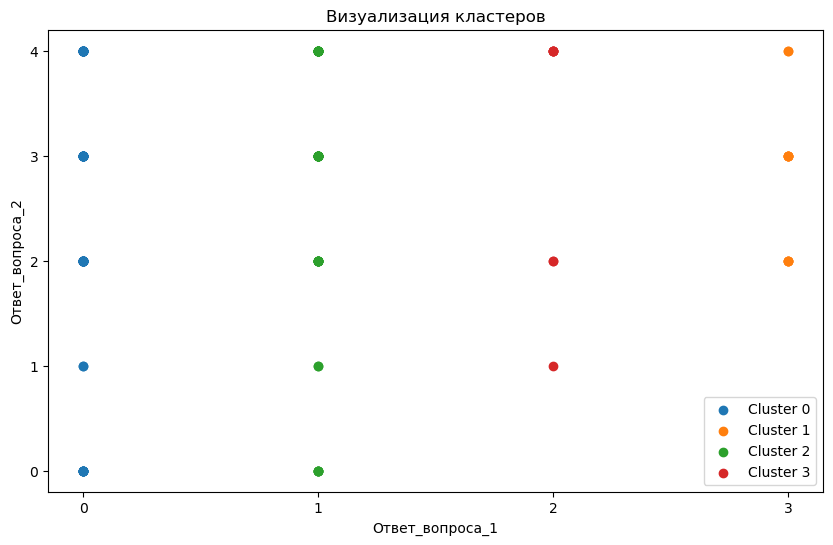

In [23]:
import matplotlib.pyplot as plt

# Разбиваем данные на кластеры
cluster_0 = df[df['Cluster'] == 0]
cluster_1 = df[df['Cluster'] == 1]
cluster_2 = df[df['Cluster'] == 2]
cluster_3 = df[df['Cluster'] == 3]

# Визуализация
plt.figure(figsize=(10, 6))

plt.scatter(cluster_0['Ответ_вопроса_1'], cluster_0['Ответ_вопроса_2'], label='Cluster 0')
plt.scatter(cluster_1['Ответ_вопроса_1'], cluster_1['Ответ_вопроса_2'], label='Cluster 1')
plt.scatter(cluster_2['Ответ_вопроса_1'], cluster_2['Ответ_вопроса_2'], label='Cluster 2')
plt.scatter(cluster_3['Ответ_вопроса_1'], cluster_3['Ответ_вопроса_2'], label='Cluster 3')

plt.xlabel('Ответ_вопроса_1')
plt.ylabel('Ответ_вопроса_2')
plt.title('Визуализация кластеров')
plt.legend()

# Установка шага для меток оси x и y
plt.xticks(range(int(df['Ответ_вопроса_1'].min()), int(df['Ответ_вопроса_1'].max()) + 1))
plt.yticks(range(int(df['Ответ_вопроса_2'].min()), int(df['Ответ_вопроса_2'].max()) + 1))

plt.show()


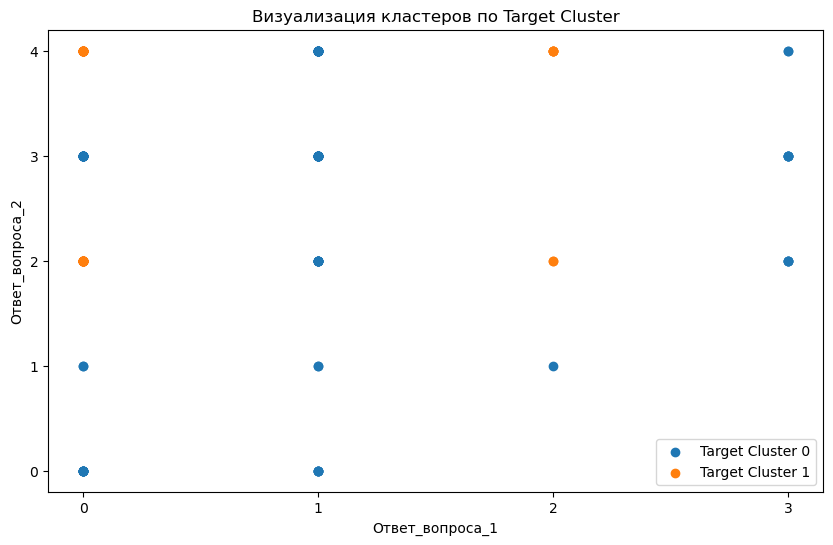

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

# Визуализация
plt.figure(figsize=(10, 6))

# Разбиваем данные на кластеры по Target Cluster
for target_label in df['Target_Cluster'].unique():
    target_data = df[df['Target_Cluster'] == target_label]
    plt.scatter(target_data['Ответ_вопроса_1'], target_data['Ответ_вопроса_2'], label=f'Target Cluster {target_label}')

plt.xlabel('Ответ_вопроса_1')
plt.ylabel('Ответ_вопроса_2')
plt.title('Визуализация кластеров по Target Cluster')

# Установка шага для меток оси x и y
plt.xticks(range(int(df['Ответ_вопроса_1'].min()), int(df['Ответ_вопроса_1'].max()) + 1))
plt.yticks(range(int(df['Ответ_вопроса_2'].min()), int(df['Ответ_вопроса_2'].max()) + 1))

plt.legend()
plt.show()
